# Application of Regression to Recovery 2010 data set 

## Overview

In this lab we will apply regression to some realistic data. We will work with Recovery 2010 dataset. The goal is to construct a linear regression model to predict the PaymentRate of collection accounts from their characters.

### Steps

1. Use Matplotlib, pandas, seaborn libraries to visualize data distribution
2. Apply transformations to features adn labels to improve model performance
3. Compare regression models to improve model performance

## Machine Learning Cloud Platform

This ML project will leverage Azure Machine Learning Service to manage and deploy models. We will adopt Azure automated ML capabilities to identify suitable algorithms and hyperparameters. 

The interaction with Azure ML service is out of today's demo scope, today will focus on data exploration analysis (EDA).

In [1]:
import azureml.core

In [2]:
print(azureml.core.VERSION)

1.0.10


In [3]:
from azureml.core import Workspace

In [4]:

ws = Workspace.get(name='TeranetML',
                      subscription_id='6beda5ae-acd3-4aba-b98f-5f5f4626e271', 
                      resource_group='Maggie'
                     )
ws.get_details()

{'id': '/subscriptions/6beda5ae-acd3-4aba-b98f-5f5f4626e271/resourceGroups/Maggie/providers/Microsoft.MachineLearningServices/workspaces/TeranetML',
 'name': 'TeranetML',
 'location': 'eastus',
 'type': 'Microsoft.MachineLearningServices/workspaces',
 'workspaceid': '36ee4e66-9620-4099-ad91-929b75a01d5e',
 'description': '',
 'friendlyName': '',
 'creationTime': '2018-10-22T15:18:17.9052287+00:00',
 'containerRegistry': '/subscriptions/6beda5ae-acd3-4aba-b98f-5f5f4626e271/resourcegroups/maggie/providers/microsoft.containerregistry/registries/teranetml5173326854',
 'keyVault': '/subscriptions/6beda5ae-acd3-4aba-b98f-5f5f4626e271/resourcegroups/maggie/providers/microsoft.keyvault/vaults/teranetml1025629701',
 'applicationInsights': '/subscriptions/6beda5ae-acd3-4aba-b98f-5f5f4626e271/resourcegroups/maggie/providers/microsoft.insights/components/teranetml9724214718',
 'identityPrincipalId': '7555e748-6ebe-47aa-89e0-a4073d467e4f',
 'identityTenantId': 'e17e2402-2a40-42ce-ad75-5848b8d4f6b6'

In [5]:
#ws.write_config()

In [6]:
#!more aml_config/config.json


In [7]:
from azureml.core import Experiment


In [8]:
#exp=Experiment(workspace=ws,name='MyExperiment_Recovery2010')
#run=exp.start_logging()

## Load the dataset 

In [9]:
import pandas as pd
import datetime
recovery2010 = pd.read_csv('Recovery2010.csv')

In [10]:
recovery2010.shape

(15441, 62)

In [11]:
recovery2010.head()

,ClientCode,AccountCode,CollectInvCode,Owing,Arrears,IntRate,IntRateOverPrime,PaymentSchedule,TotalBalanceOriginal,DaysSinceDebtorAccountsLastPaymentDate,...,countOfCcs,CommissionIndicator,AgencyId,AgencyManagerId,AgencyCollectorId,PercentOfBalance,PercentOfPrincipal,SettlementAmount,DaysSinceSettlementApproved,paymentRate
0,298,1099861,840521,0,0.0,19.99,0.0,10,490.27,2874,...,0,1,1417,2456,12456,0,0,0,2874,2.544598
1,298,1099868,840528,0,0.0,0.00,0.0,2,0.00,-9455,...,0,1,1417,2456,12456,0,0,0,2776,0.000000
2,298,1099871,840533,0,0.0,0.00,0.0,2,55.71,-9455,...,0,1,1417,2456,12456,0,0,0,2022,13.154371
3,298,1099877,840540,0,0.0,0.00,0.0,2,121.33,-9455,...,0,1,1417,2456,12456,0,0,0,1540,13.526416
4,298,1099882,840544,0,0.0,0.00,0.0,2,0.00,-9455,...,0,1,1417,2456,12456,0,0,0,1905,0.000000


In [12]:
recovery2010.columns

Index(['ClientCode', 'AccountCode', 'CollectInvCode', 'Owing', 'Arrears',
       'IntRate', 'IntRateOverPrime', 'PaymentSchedule',
       'TotalBalanceOriginal', 'DaysSinceDebtorAccountsLastPaymentDate',
       'DebtorAccountsLastPaymentAmount', 'JudgementFlag', 'TransUnionScore',
       'CreditScore', 'BureauScore', 'BehaviourScore', 'WriteOff',
       'TotalBalanceCurrent', 'DaysSinceDebtorAccountBalanceLastPaymentDate',
       'DebtorAccountBalanceLastPaymentAmount',
       'DaysElapsedBetweenLastPaymentDates', 'assignmentAccountCode',
       'assignCode', 'LanguageCode', 'DaysSinceDateOfBirth',
       'DaysSinceDateOfDeath', 'DaysSinceBankruptcyDate',
       'AssignmentHasKeepDate', 'BankruptId', 'BankruptcyFlag',
       'ThisPartyIsBankrupt', 'OccupationLength', 'TrusteeCodeLength',
       'HasExecutor', 'DoNotCallId', 'PartyTypeCode', 'primaryIsCcs',
       'primaryIsBankrupt', 'SumOfRemitances', 'CountOfRemitances',
       'averageRemitance', 'CollectionClientRequestCode',
     

In [13]:
recovery2010.describe()

,ClientCode,AccountCode,CollectInvCode,Owing,Arrears,IntRate,IntRateOverPrime,PaymentSchedule,TotalBalanceOriginal,DaysSinceDebtorAccountsLastPaymentDate,...,countOfCcs,CommissionIndicator,AgencyId,AgencyManagerId,AgencyCollectorId,PercentOfBalance,PercentOfPrincipal,SettlementAmount,DaysSinceSettlementApproved,paymentRate
count,15441.0,1.544100e+04,1.544100e+04,15441.0,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,...,15441.0,15441.000000,15441.000000,15441.000000,15441.000000,15441.0,15441.0,15441.0,15441.000000,15322.000000
mean,298.0,1.277092e+06,1.004092e+06,0.0,8.662363,12.517799,0.644415,8.782009,447.149122,1196.513503,...,0.0,0.963150,1533.685254,4182.541804,6286.414481,0.0,0.0,0.0,2471.062690,10.260399
std,0.0,1.300381e+05,1.845085e+05,0.0,288.036085,8.992713,1.847671,2.874042,791.584027,4168.504646,...,0.0,0.188399,120.446978,1500.168262,3404.890736,0.0,0.0,0.0,772.553496,77.283273
min,298.0,1.099852e+06,0.000000e+00,0.0,0.000000,0.000000,-1.000000,1.000000,0.000000,-9455.000000,...,0.0,0.000000,1326.000000,2276.000000,2277.000000,0.0,0.0,0.0,-9455.000000,0.000000
25%,298.0,1.172733e+06,9.121650e+05,0.0,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000,...,0.0,1.000000,1417.000000,4354.000000,4355.000000,0.0,0.0,0.0,1987.000000,0.000000
50%,298.0,1.250410e+06,9.914450e+05,0.0,0.000000,19.500000,0.000000,10.000000,142.750000,3204.000000,...,0.0,1.000000,1623.000000,4354.000000,4355.000000,0.0,0.0,0.0,2799.000000,1.283009
75%,298.0,1.325574e+06,1.068177e+06,0.0,0.000000,19.500000,0.000000,10.000000,582.550000,3357.000000,...,0.0,1.000000,1640.000000,4354.000000,4355.000000,0.0,0.0,0.0,3045.000000,7.419866
max,298.0,1.535708e+06,1.276079e+06,0.0,23611.830000,24.990000,19.990000,11.000000,15655.680000,11345.000000,...,0.0,1.000000,1841.000000,13661.000000,14743.000000,0.0,0.0,0.0,5118.000000,3785.971292


In [14]:
recovery2010.dtypes

ClientCode                                        int64
AccountCode                                       int64
CollectInvCode                                    int64
Owing                                             int64
Arrears                                         float64
IntRate                                         float64
IntRateOverPrime                                float64
PaymentSchedule                                   int64
TotalBalanceOriginal                            float64
DaysSinceDebtorAccountsLastPaymentDate            int64
DebtorAccountsLastPaymentAmount                 float64
JudgementFlag                                     int64
TransUnionScore                                   int64
CreditScore                                       int64
BureauScore                                       int64
BehaviourScore                                    int64
WriteOff                                         object
TotalBalanceCurrent                             

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import sklearn.metrics as sklm
from sklearn import preprocessing
from sklearn import linear_model
import scipy.stats as ss
import seaborn as sbn
import math

%matplotlib inline

In [16]:
#Frequency table to display distribution of variables 
def count_unique(recovery2010, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(recovery2010[col].value_counts())

cat_cols = ['ClientCode', 'AccountCode', 'CollectInvCode', 'Owing', 'Arrears',
       'IntRate', 'IntRateOverPrime', 'PaymentSchedule',
       'TotalBalanceOriginal', 'DaysSinceDebtorAccountsLastPaymentDate',
       'DebtorAccountsLastPaymentAmount', 'JudgementFlag', 'TransUnionScore',
       'CreditScore', 'BureauScore', 'BehaviourScore', 'WriteOff',
       'TotalBalanceCurrent', 'DaysSinceDebtorAccountBalanceLastPaymentDate',
       'DebtorAccountBalanceLastPaymentAmount',
       'DaysElapsedBetweenLastPaymentDates', 'assignmentAccountCode',
       'assignCode', 'LanguageCode', 'DaysSinceDateOfBirth',
       'DaysSinceDateOfDeath', 'DaysSinceBankruptcyDate',
       'AssignmentHasKeepDate', 'BankruptId', 'BankruptcyFlag',
       'ThisPartyIsBankrupt', 'OccupationLength', 'TrusteeCodeLength',
       'HasExecutor', 'DoNotCallId', 'PartyTypeCode', 'primaryIsCcs',
       'primaryIsBankrupt', 'SumOfRemitances', 'CountOfRemitances',
       'averageRemitance', 'CollectionClientRequestCode',
       'CollectionClientRequest', 'BankruptAccountCode',
       'CollectionInstructionCode', 'CollectionInstructionDescription',
       'CollectionStatusCode', 'CollectionStatusDescription',
       'collectionInventoryPromiseToPayAmount',
       'daysSinceCollectionInventoryPromiseToPayDate', 'countOfParties',
       'countOfBankrupts', 'countOfCcs', 'CommissionIndicator', 'AgencyId',
       'AgencyManagerId', 'AgencyCollectorId', 'PercentOfBalance',
       'PercentOfPrincipal', 'SettlementAmount', 'DaysSinceSettlementApproved',
       'paymentRate']
count_unique(recovery2010, cat_cols)


For column ClientCode
298    15441
Name: ClientCode, dtype: int64

For column AccountCode
1284637    3
1114398    3
1153582    3
1514291    2
1203048    2
1530682    2
1135733    2
1166243    2
1177760    2
1291516    2
1214272    2
1411538    2
1529451    2
1236407    2
1235020    2
1304189    2
1533827    2
1267961    2
1303023    2
1151454    2
1292879    2
1291722    2
1117374    2
1534379    2
1224825    2
1100878    2
1223710    2
1177861    2
1257317    2
1299549    2
          ..
1163918    1
1473717    1
1205885    1
1148090    1
1203441    1
1299696    1
1231074    1
1291500    1
1128898    1
1217768    1
1109223    1
1275108    1
1493129    1
1486047    1
1281243    1
1154265    1
1176788    1
1526962    1
1225932    1
1252553    1
1284998    1
1172678    1
1133763    1
1295554    1
1367233    1
1135808    1
1123518    1
1293501    1
1127612    1
1148929    1
Name: AccountCode, Length: 15058, dtype: int64

For column CollectInvCode
0          258
1212193      3
1254541     

## Feature Removal of Recovery 2010 dataset 

From above summary statistics and one dimensional plots, some of these varialbes 95% of which has single value, the decision is to remove these variables which are not useful to model. 

BureauScore<br>
JudgementFlag<br>
TransUnionScore <br>
CreditScore<br>
BehaviourScore<br>
assignmentAccountCode<br>
assignCode<br>
LanguageCode<br>
DaysSinceDateOfBirth<br>
DaysSinceDateOfDeath<br>
DaysSinceBankruptcyDate<br>
AssignmentHasKeepDate<br>
BankruptId<br>
BankruptcyFlag<br>
ThisPartyIsBankrupt<br>
OccupationLength<br>
TrusteeCodeLength<br>
HasExecutor<br>
DoNotCallId<br>
PartyTypeCode<br>
primaryIsCcs<br>
primaryIsBankrupt<br>
BankruptAccountCode<br>
countOfParties<br>
countOfBankrupts<br>
countOfCcs<br>


###  Need to take a closer look at the distribution of the following variables, applying business domain knowledge

collectionInventoryPromiseToPayAmount  (9940 records has 0 value)<br>
daysSinceCollectionInventoryPromiseToPayDate (??)<br>
CollectionClientRequestCode (2)<br>
CommissionIndicator (??)<br>
PercentOfBalance (??all records shows as 0)<br>
PercentOfPrincipal (?? All records shows as 0)<br>
SettlementAmount (?? All records shows as 0)<br>


paymentrate (5819 records has value of 0)<br>

In [17]:
# Remove features
recovery2010.drop(['DoNotCallId',
                   'BureauScore',
                   'JudgementFlag',
                   'TransUnionScore',
'CreditScore',
'BehaviourScore',
'assignmentAccountCode',
'assignCode',
'LanguageCode',
'DaysSinceDateOfBirth',
'DaysSinceDateOfDeath',
'DaysSinceBankruptcyDate',
'AssignmentHasKeepDate',
'BankruptId',
'BankruptcyFlag',
'ThisPartyIsBankrupt',
'OccupationLength',
'TrusteeCodeLength',
'HasExecutor',
'DoNotCallId',
'PartyTypeCode',
'primaryIsCcs',
'primaryIsBankrupt',
'BankruptAccountCode',
'countOfParties',
'countOfBankrupts',
'countOfCcs',
'PercentOfBalance',
'PercentOfPrincipal',
'SettlementAmount'], axis = 1, inplace = True) 


In [18]:
recovery2010.dtypes


ClientCode                                        int64
AccountCode                                       int64
CollectInvCode                                    int64
Owing                                             int64
Arrears                                         float64
IntRate                                         float64
IntRateOverPrime                                float64
PaymentSchedule                                   int64
TotalBalanceOriginal                            float64
DaysSinceDebtorAccountsLastPaymentDate            int64
DebtorAccountsLastPaymentAmount                 float64
WriteOff                                         object
TotalBalanceCurrent                             float64
DaysSinceDebtorAccountBalanceLastPaymentDate      int64
DebtorAccountBalanceLastPaymentAmount           float64
DaysElapsedBetweenLastPaymentDates                int64
SumOfRemitances                                 float64
CountOfRemitances                               

## Visualizing data distribution 
Apply bar plots to categorical variables 
Apply histogram and density estimation plots to numeric variables

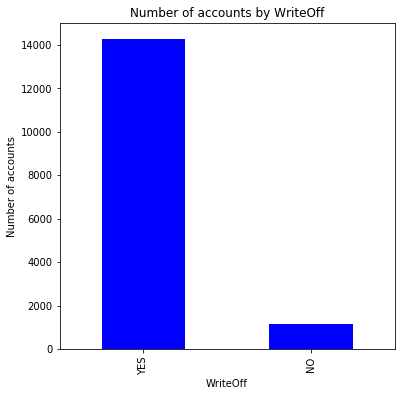

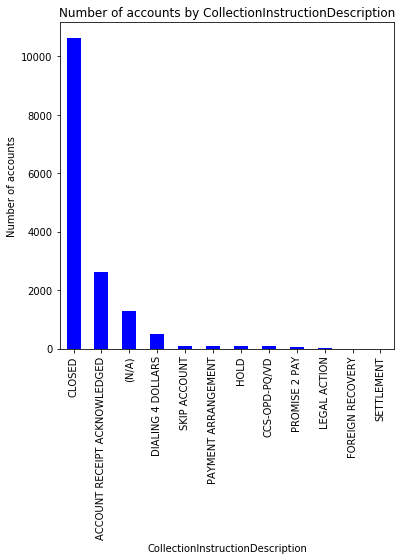

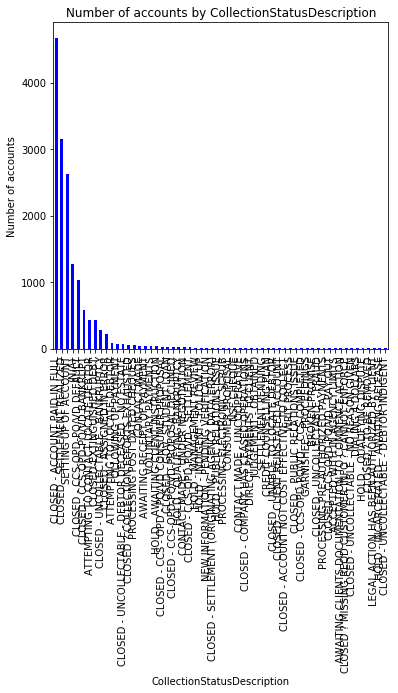

In [19]:

def plot_bars(recoveryDS, cols):
    for col in cols:
        fig = plt.figure(figsize =(6,6))
        ax = fig.gca()
        counts = recoveryDS[col].value_counts()
        counts.plot.bar(ax=ax, color='blue')
        ax.set_title('Number of accounts by ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of accounts')
        plt.show()
        
plot_cols =['WriteOff','CollectionInstructionDescription','CollectionStatusDescription']
plot_bars(recovery2010,plot_cols)

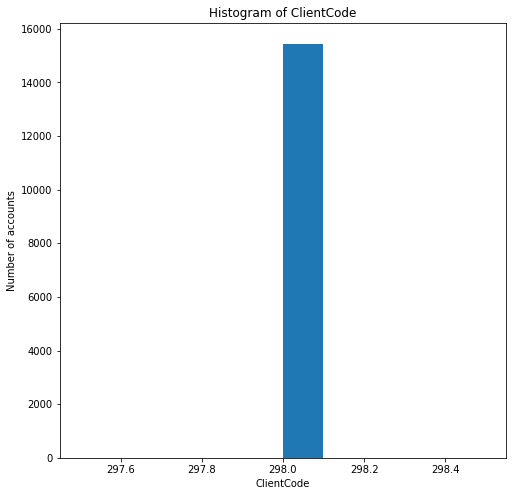

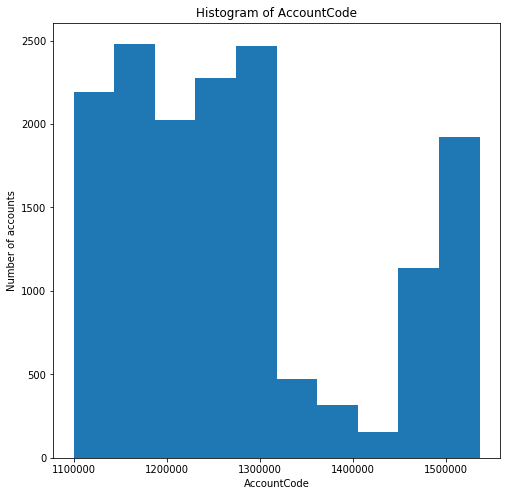

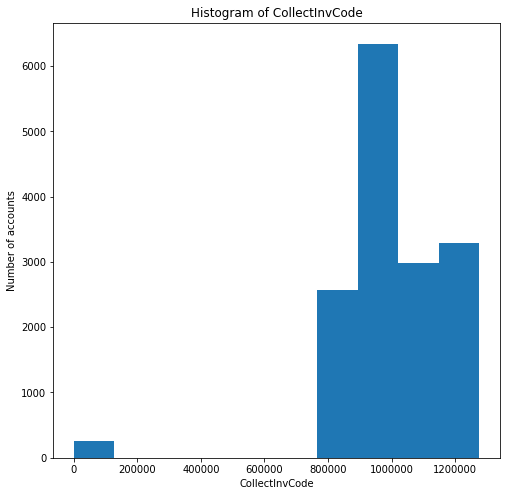

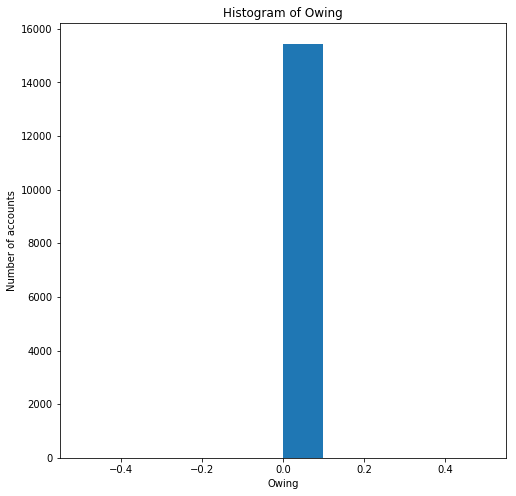

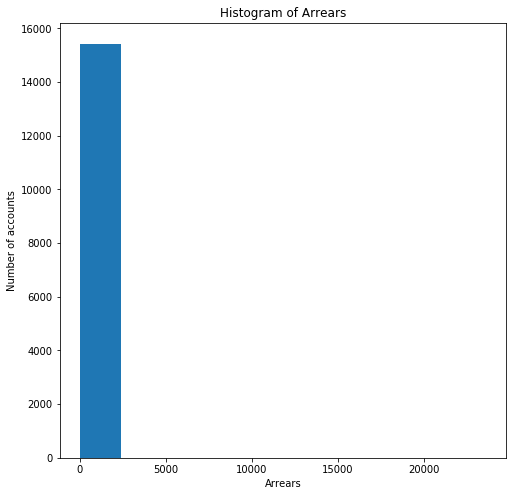

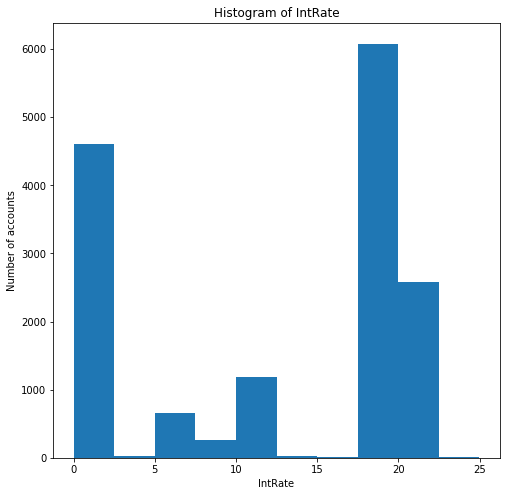

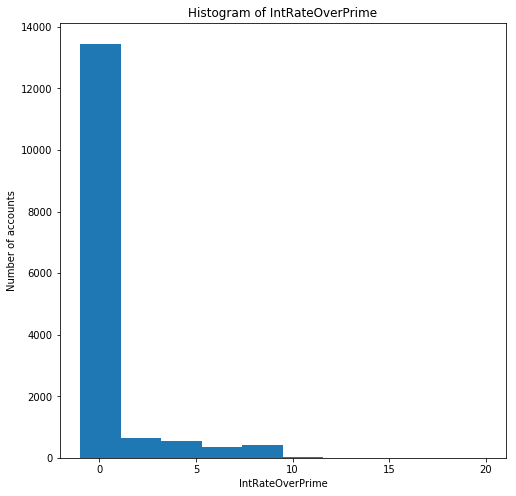

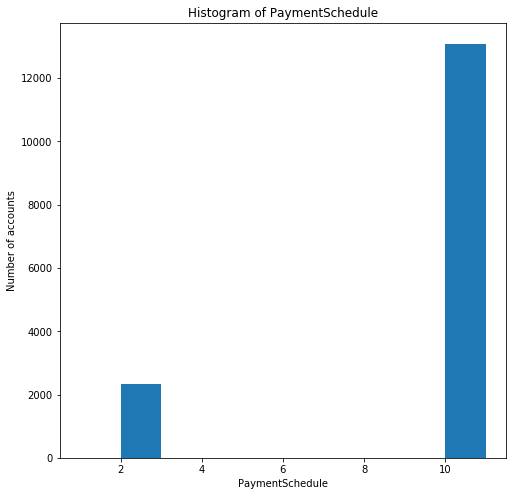

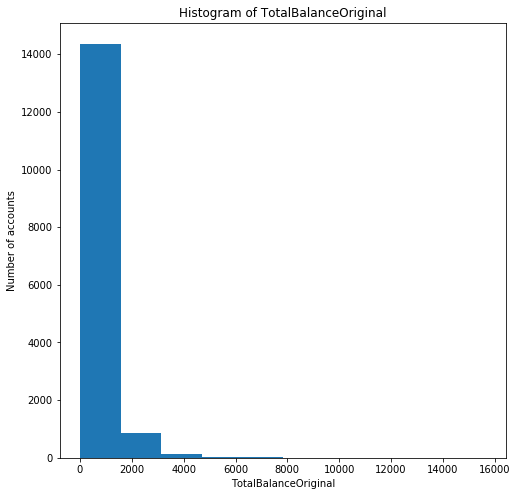

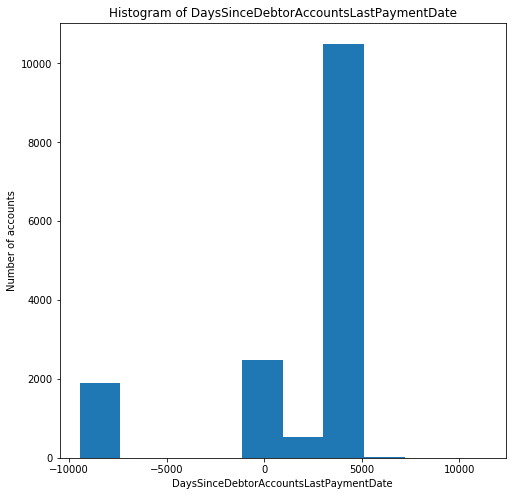

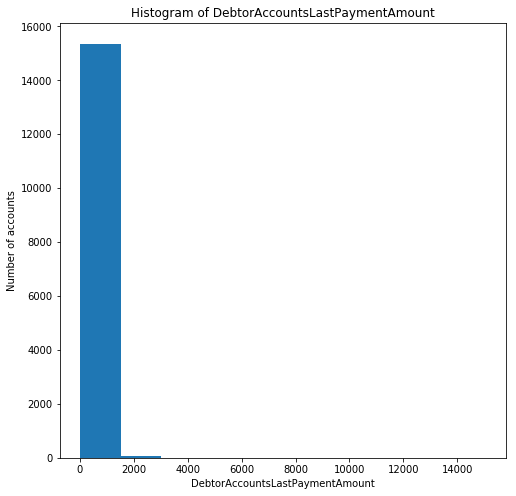

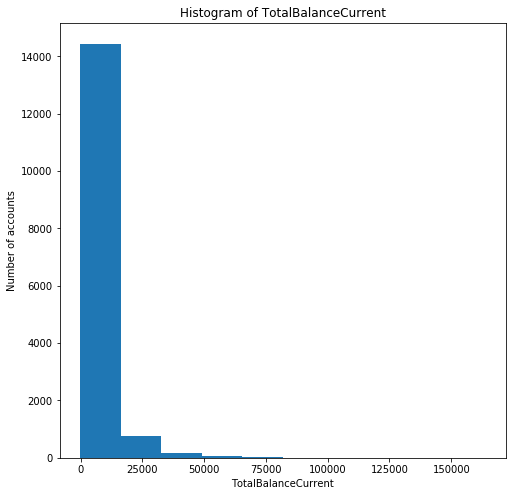

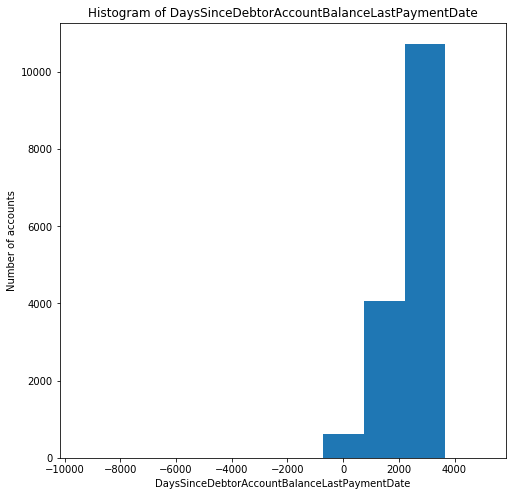

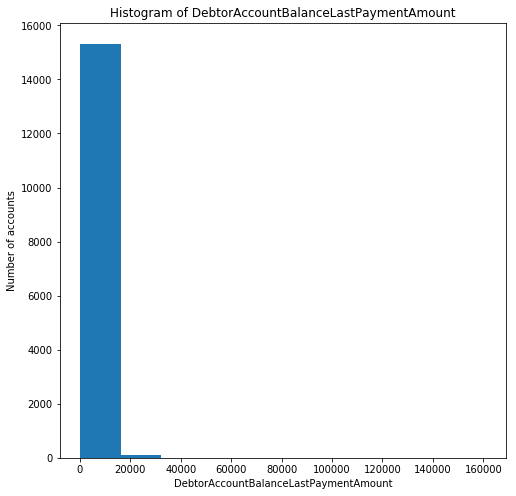

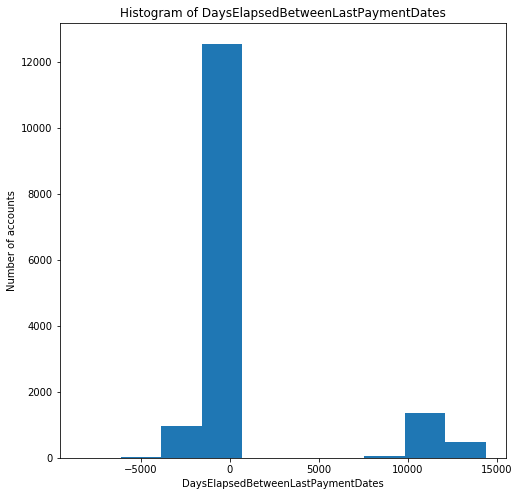

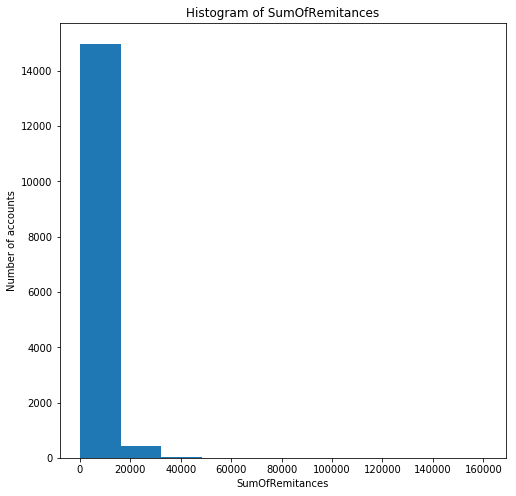

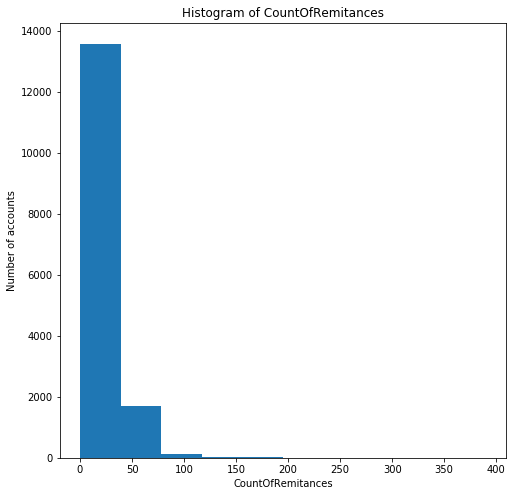

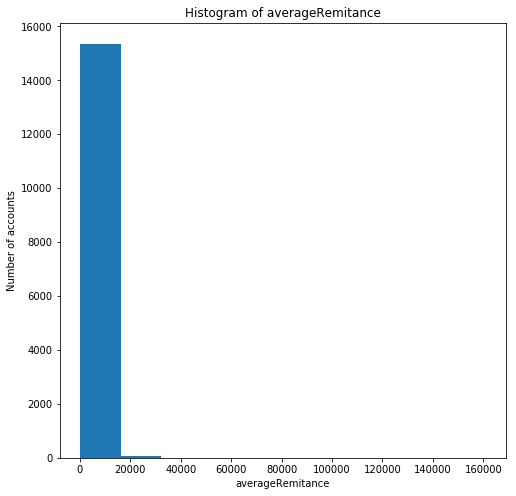

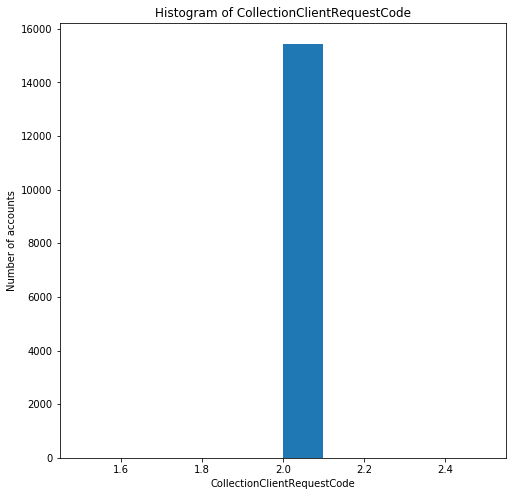

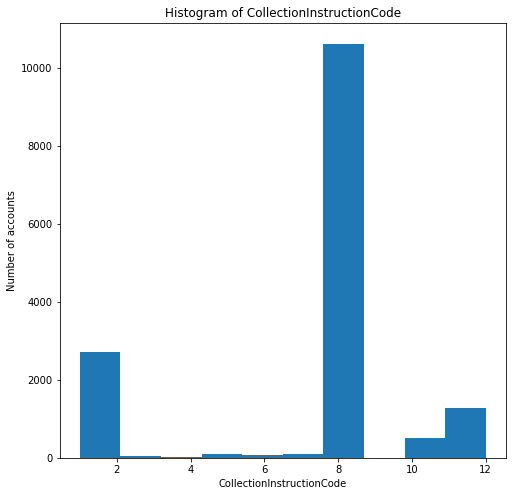

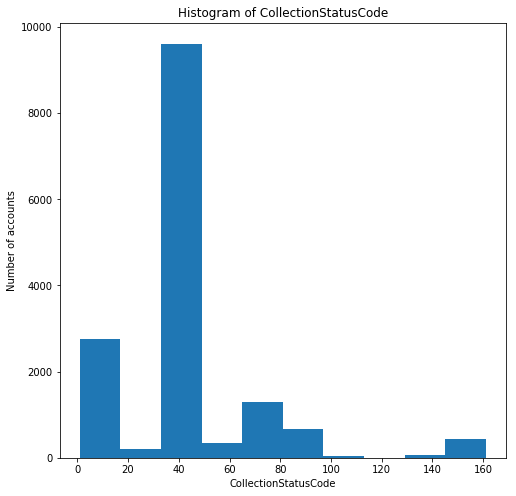

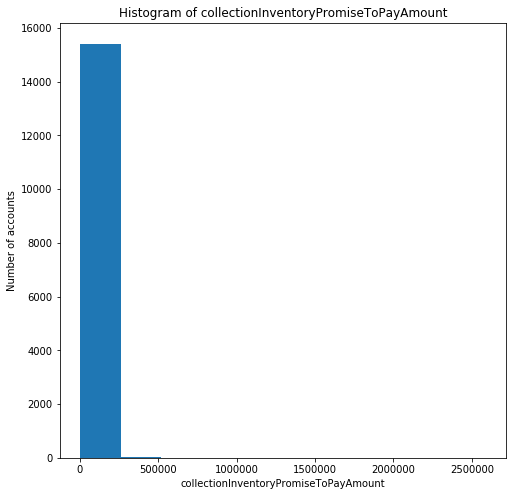

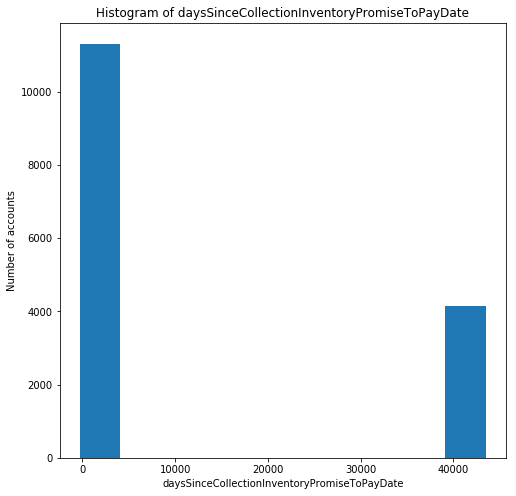

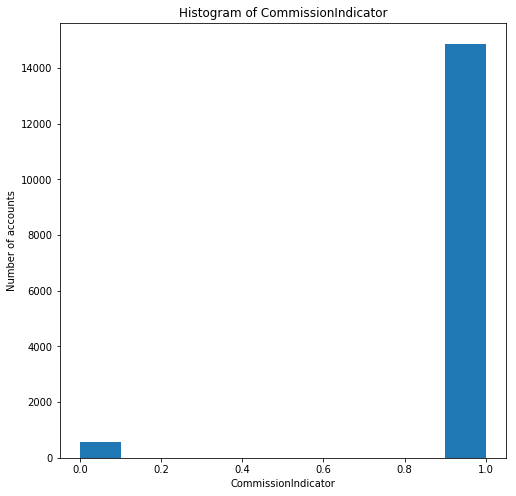

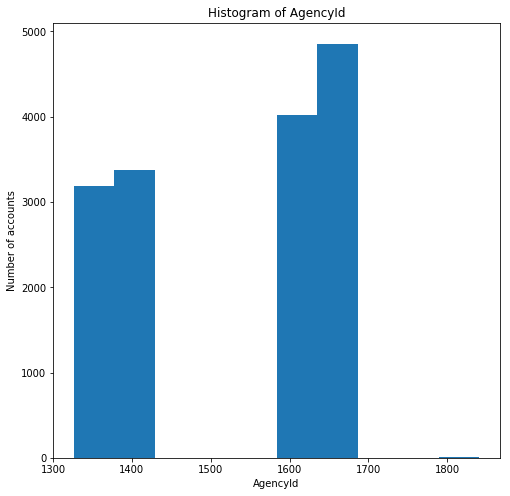

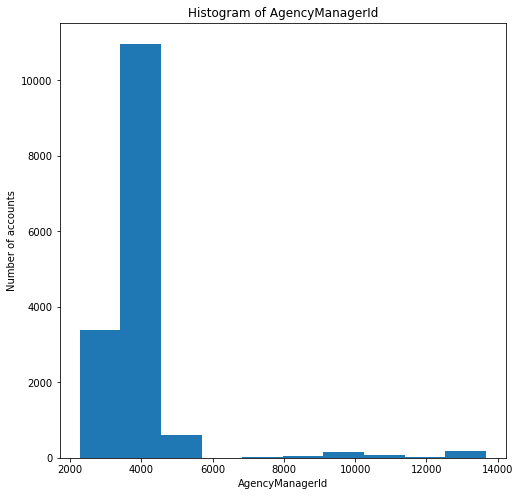

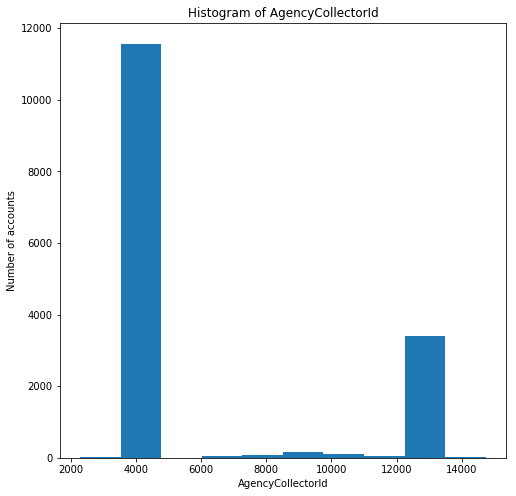

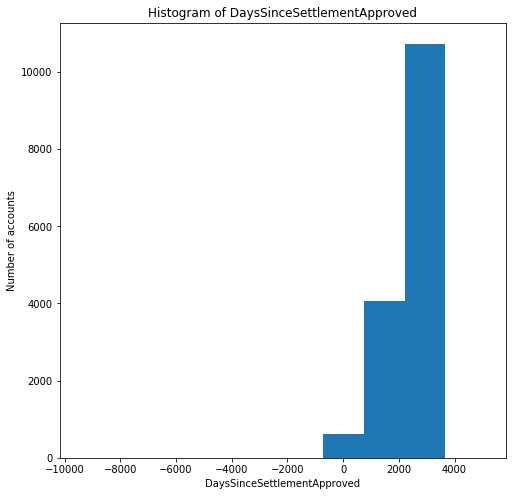

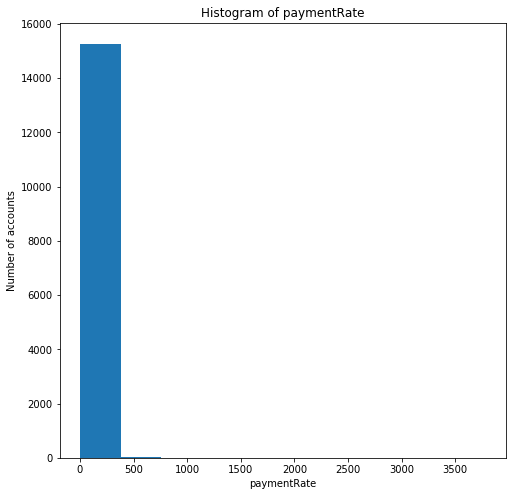

In [20]:
def plot_histogram(recoveryDS, cols, bins=10):
    for col in cols:
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca()
        recoveryDS[col].plot.hist(ax=ax, bins=bins)
        ax.set_title('Histogram of ' + col)
        ax.set_xlabel(col)
        ax.set_ylabel('Number of accounts')
        plt.show()
    
#num_cols = recovery2010.columns
num_cols = recovery2010.select_dtypes(exclude=[np.object]).columns
plot_histogram(recovery2010, num_cols)
    

C:\Users\mc9131\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\mc9131\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\mc9131\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\mc9131\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered 

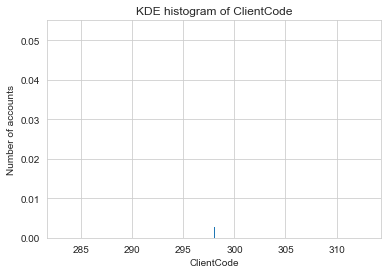

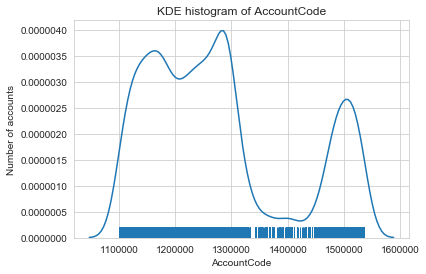

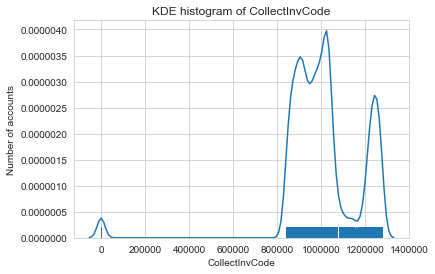

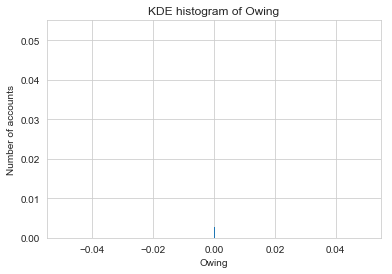

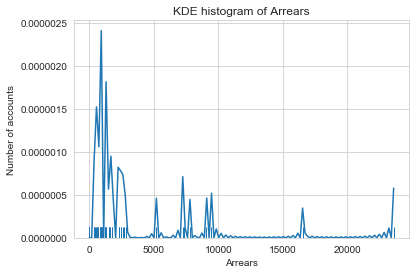

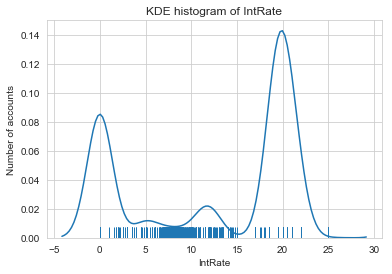

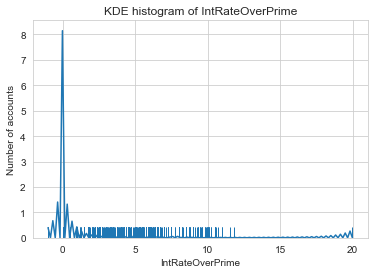

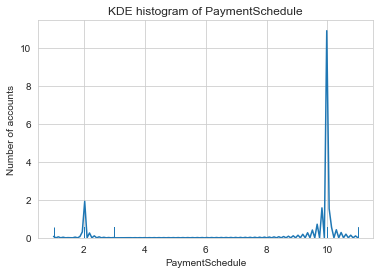

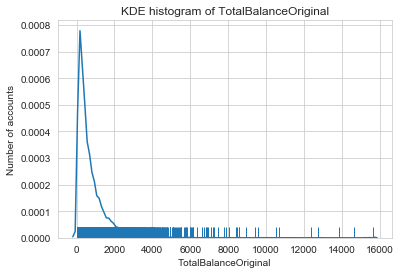

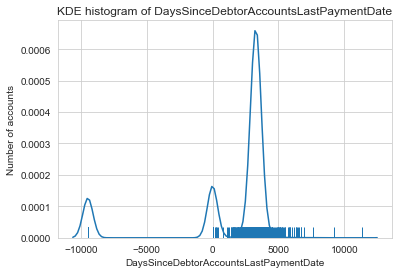

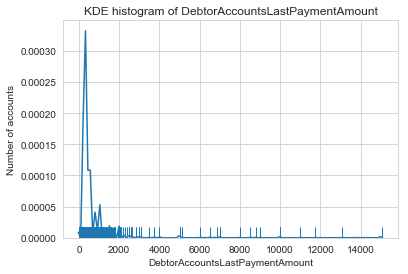

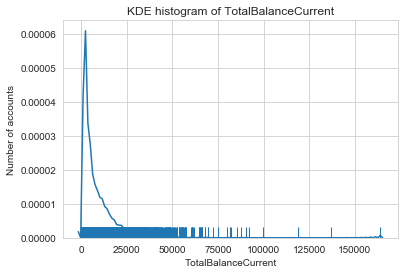

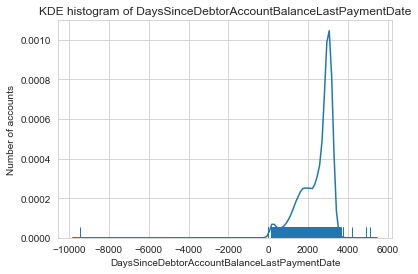

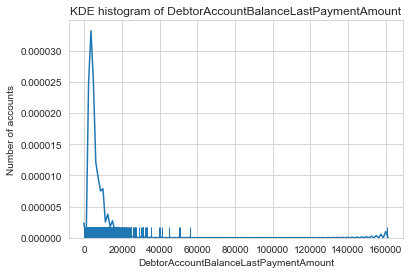

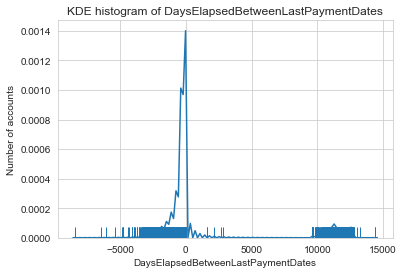

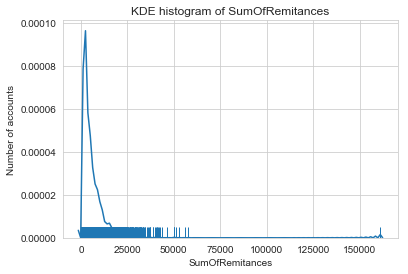

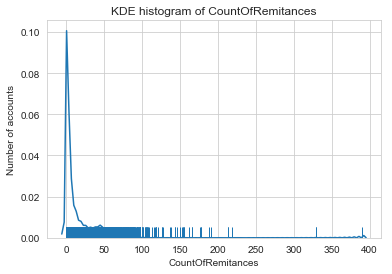

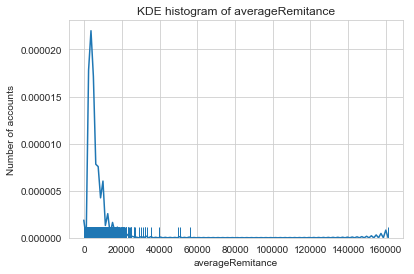

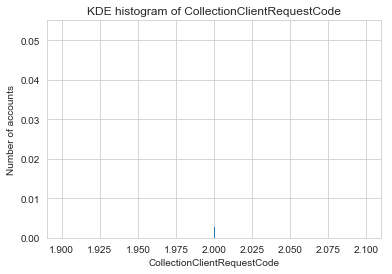

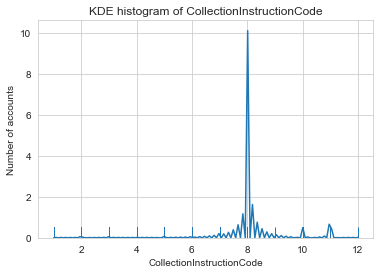

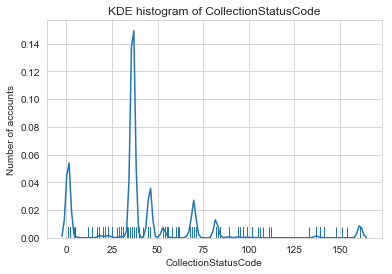

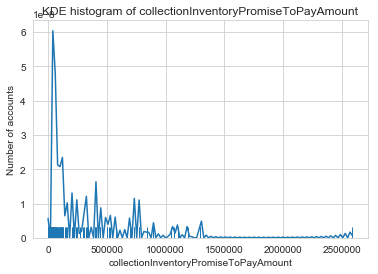

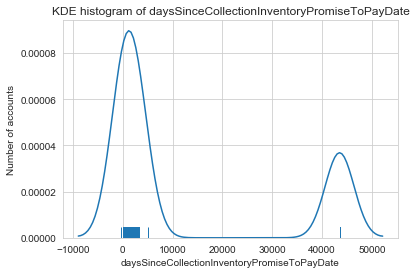

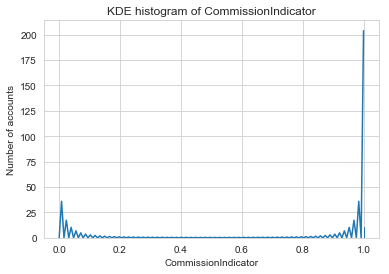

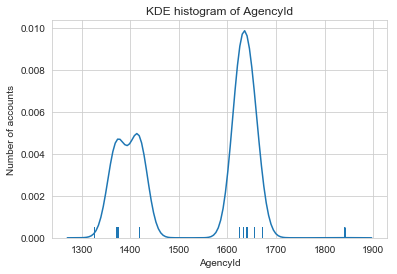

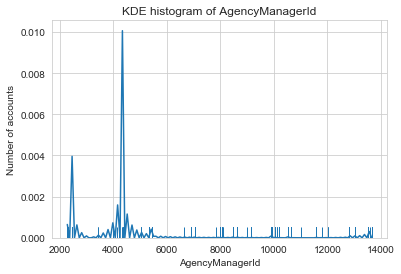

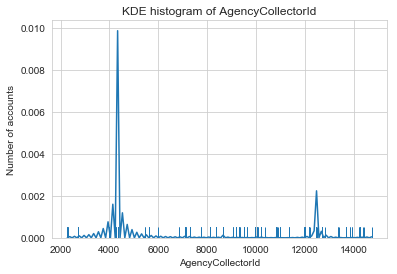

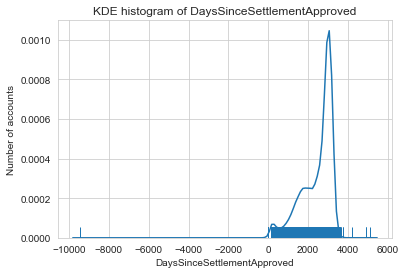

C:\Users\mc9131\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mc9131\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


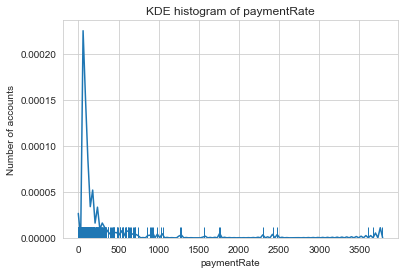

In [21]:
#Kernal densitity estimation plot
def plot_kde_hist(recoveryDS, cols, bins=10, hist=False):
    for col in cols:
        sbn.set_style('whitegrid')
        sbn.distplot(recoveryDS[col], bins=bins, rug=True, hist=hist)
        plt.title('KDE histogram of ' + col)
        plt.xlabel(col)
        plt.ylabel('Number of accounts')
        plt.show()
        
# dropping columns 
#recovery2010.drop(["TotalBalanceCurrent"], axis = 1, inplace = True) 
#kde_cols = recovery2010.select_dtypes(exclude=[np.object]).columns

plot_kde_hist(recovery2010, num_cols)
        
    


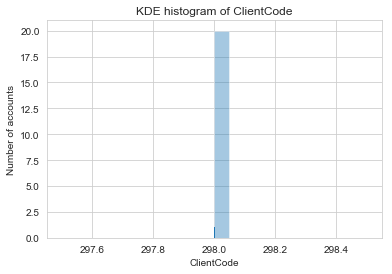

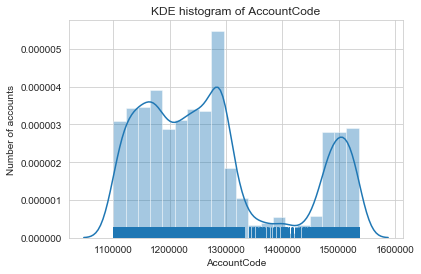

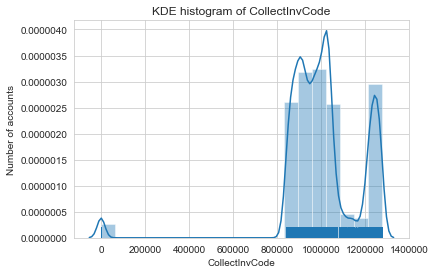

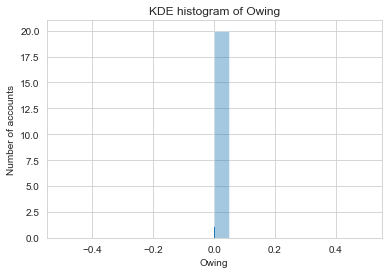

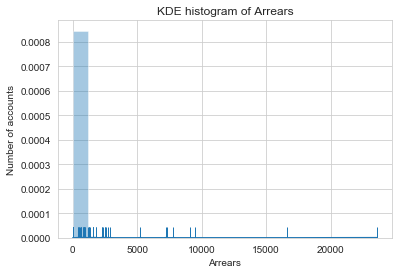

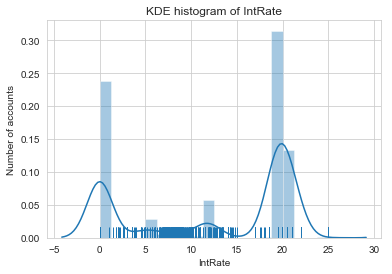

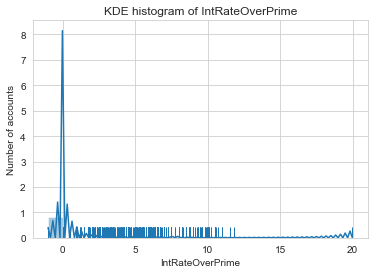

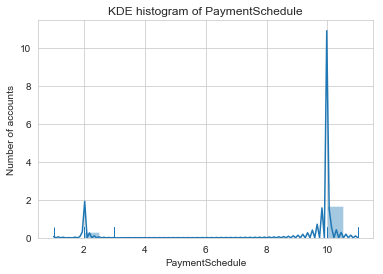

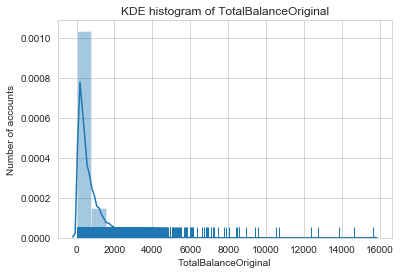

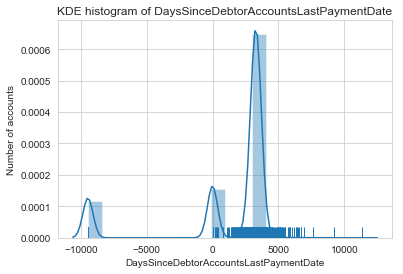

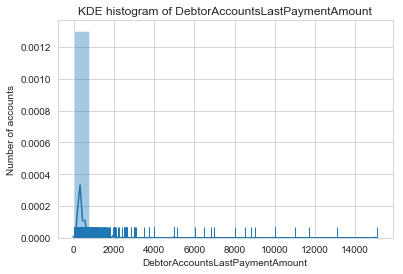

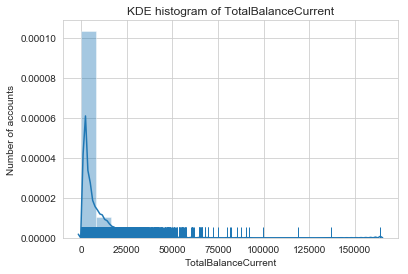

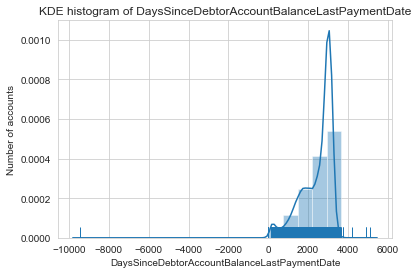

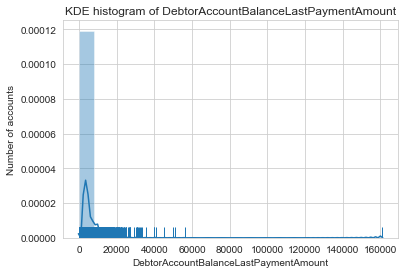

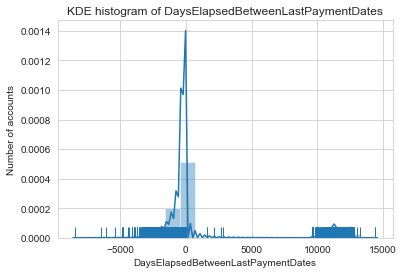

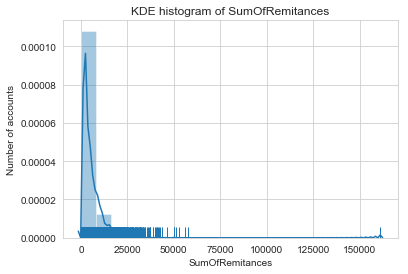

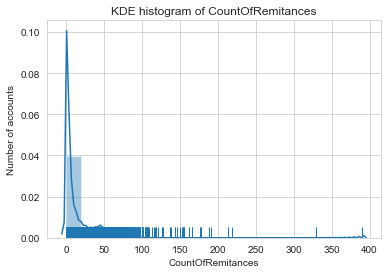

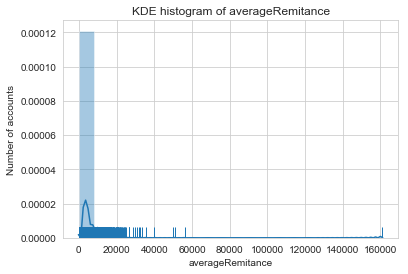

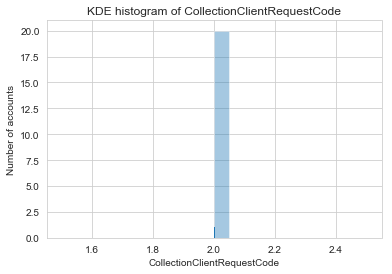

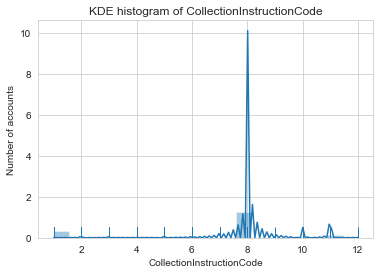

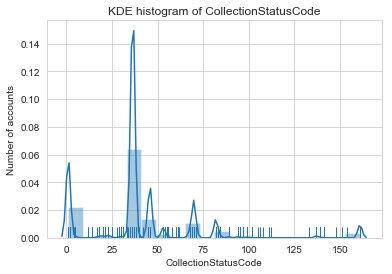

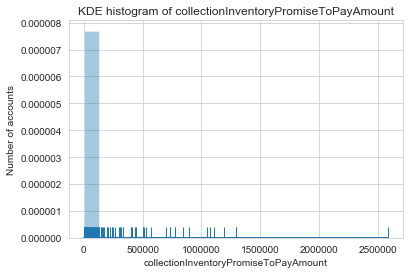

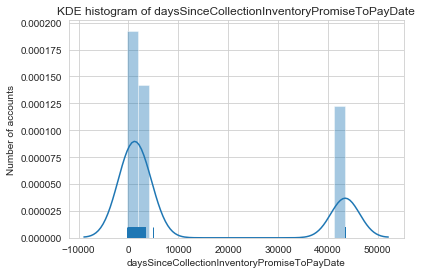

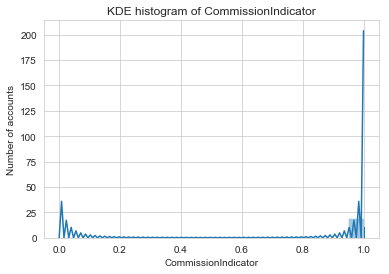

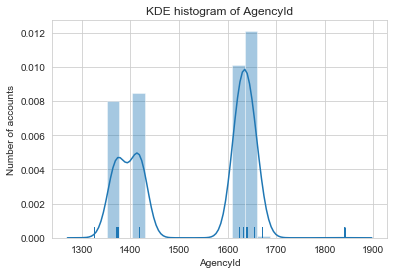

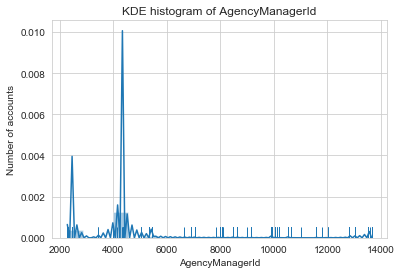

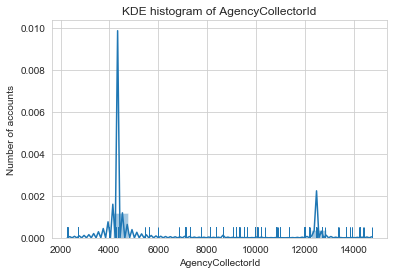

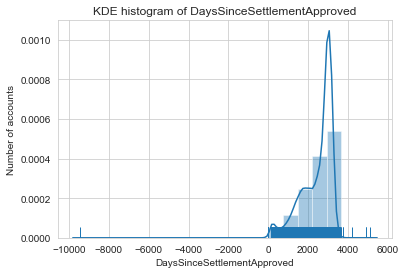

C:\Users\mc9131\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mc9131\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


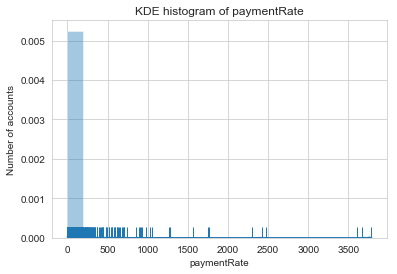

In [22]:
#combine kde and histogram
plot_kde_hist(recovery2010, num_cols, bins=20, hist = True)

## Remove redundant columns

ClientCode is one single value 298 and can be removed. <br>
Owing (all shows as 0) <br>
Arreas(all shows as 0) <br>

In [23]:

recovery2010.drop(['ClientCode',
                   'Owing',
                   'Arrears',
                   'CollectionClientRequest',
                   'CollectionInstructionDescription',
                   'CollectionStatusDescription'],axis=1, inplace=True)

## Two dimensional plots

Having used summary statistics and several one dimensional plot methods to explore data, you will continue this exploration using **two dimensional plots**. Two dimensional plots help you develop an understanding  of the **relationship between two variables**. For machine learning, the relationship of greatest interest is between the **features** and the **label**. It can also be useful to examine the relationships between features to determine if the features are co-variate or not. Such a procedure can prove more reliable than simply computing correlation when the relationship is nonlinear. 

### Create Scatter Plots

Scatter plots are widely used to examine the relationship between two variables. In this case, the plots created are of some features vs. the label, payment rate of the account. 

The code in the cell below follows the previously used recipe for using Pandas plotting methods, using the `plot.scatter` method. This method has two required arguments for the x and y axes. Execute this code and examine the results.

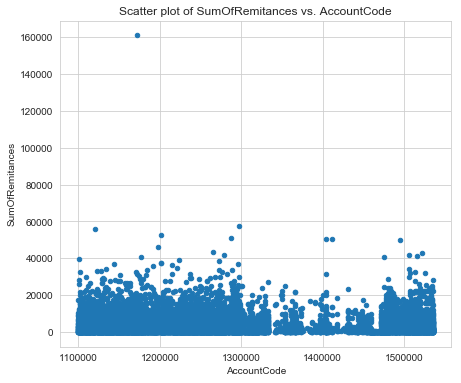

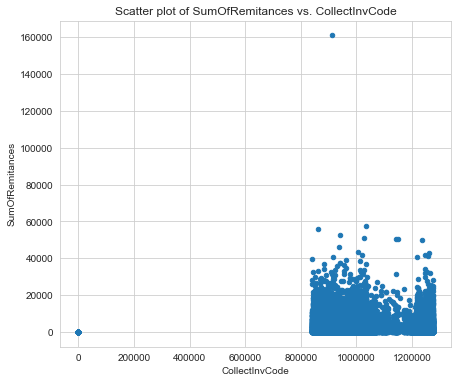

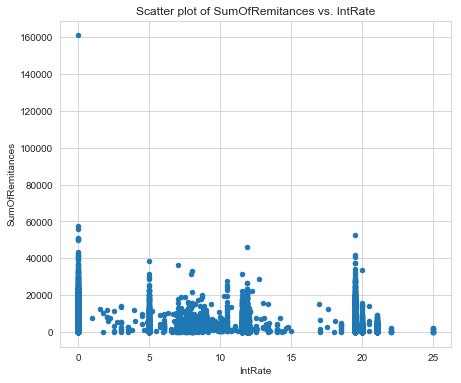

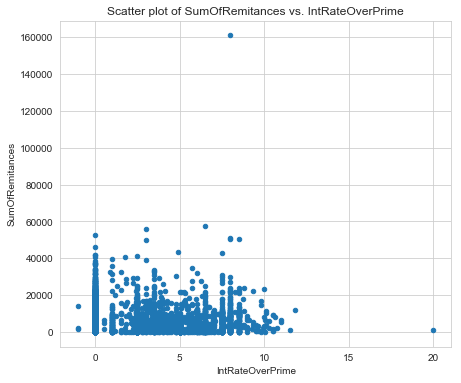

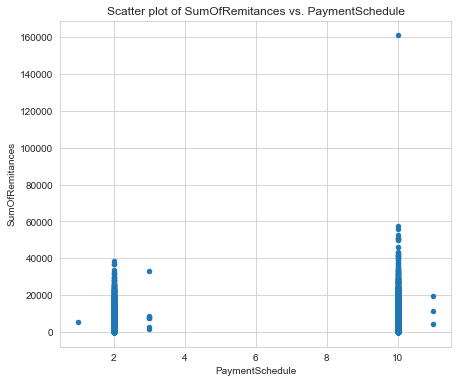

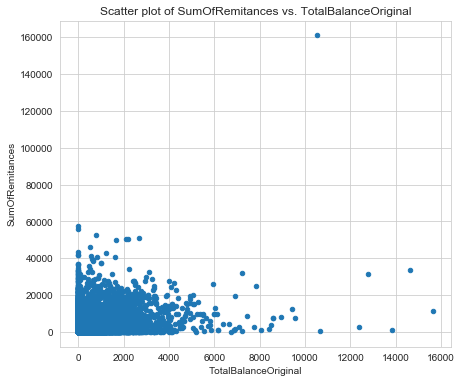

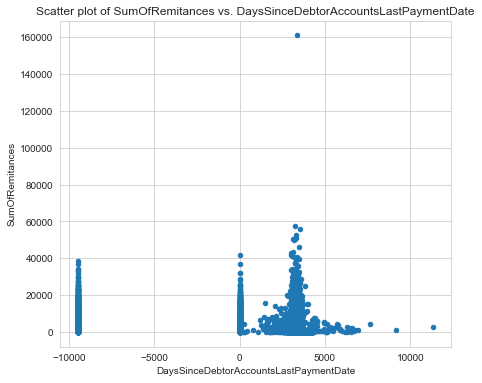

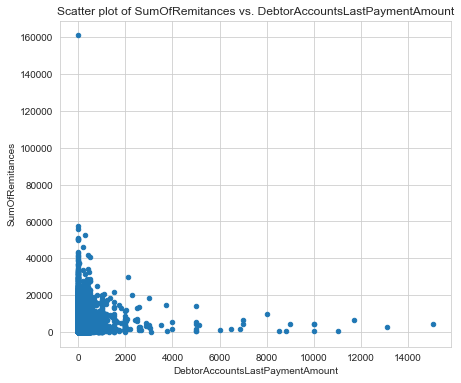

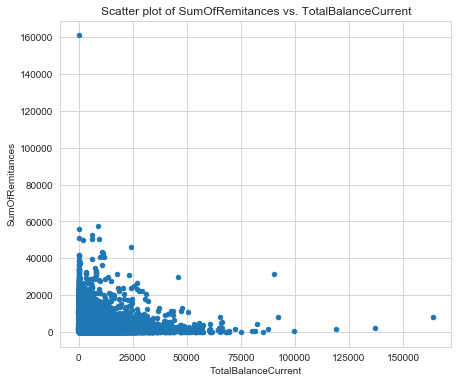

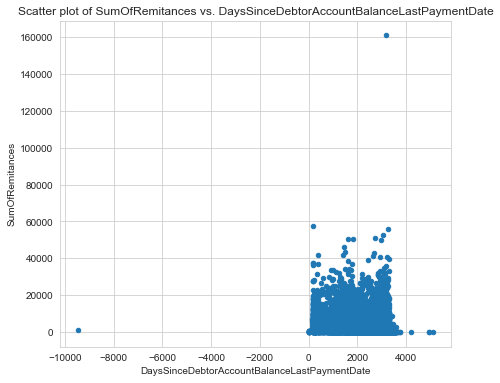

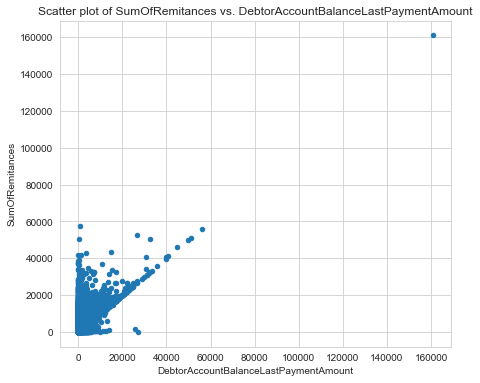

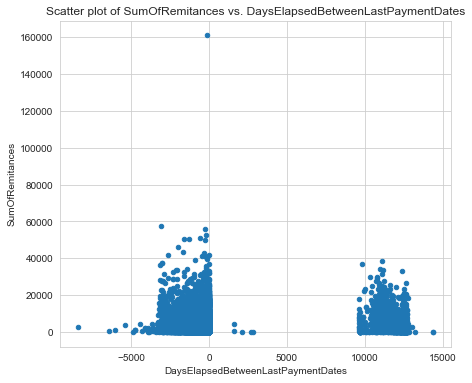

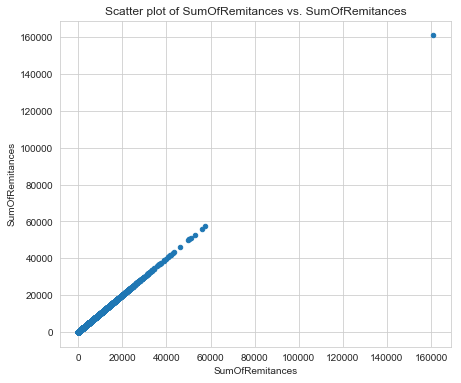

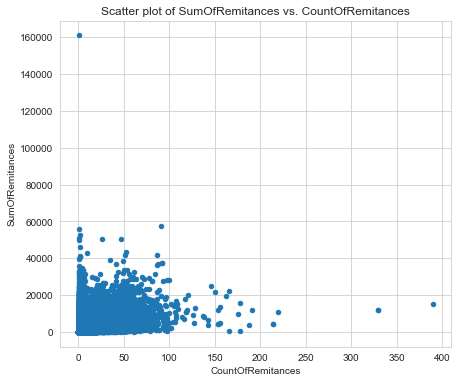

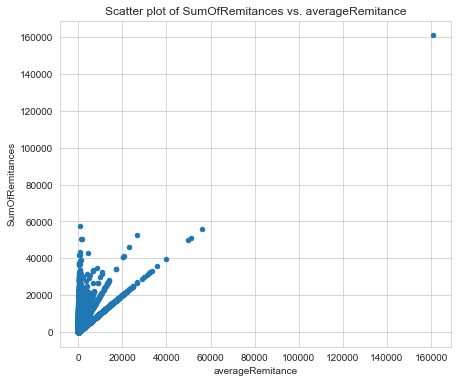

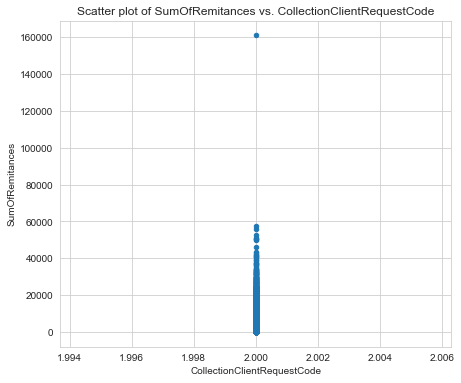

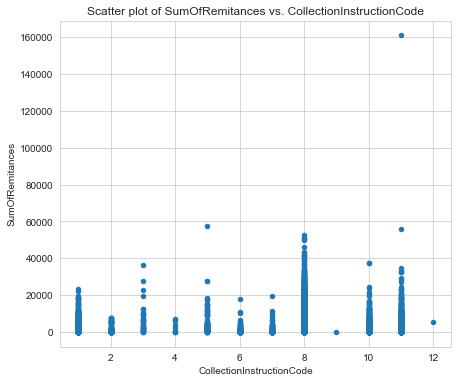

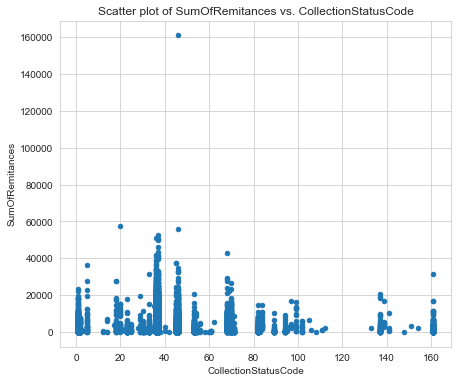

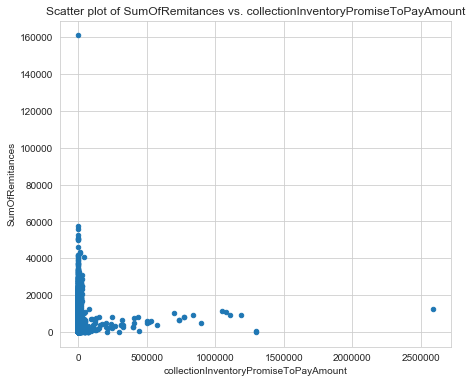

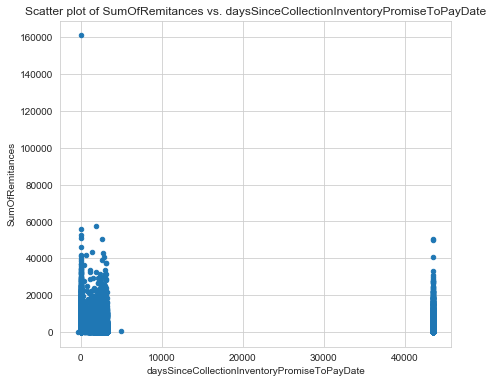

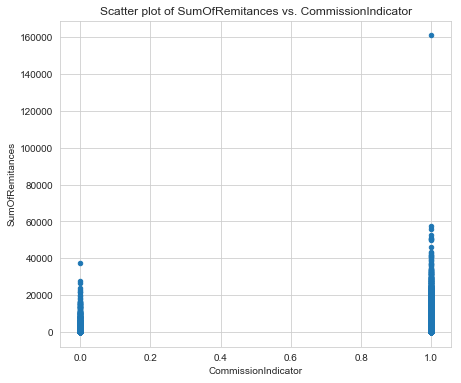

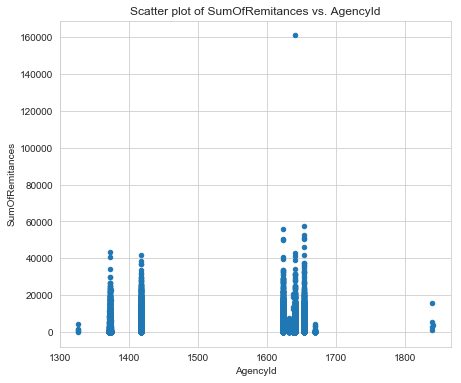

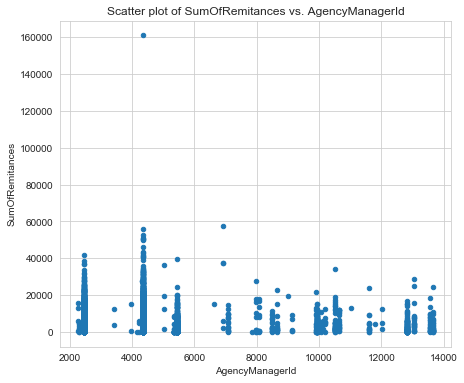

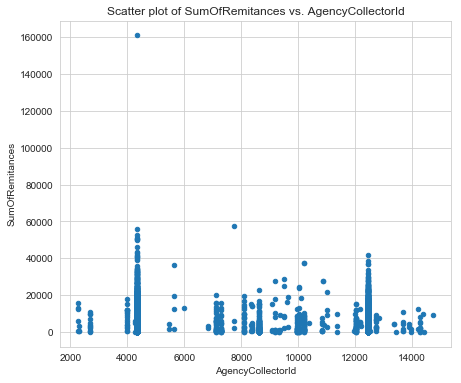

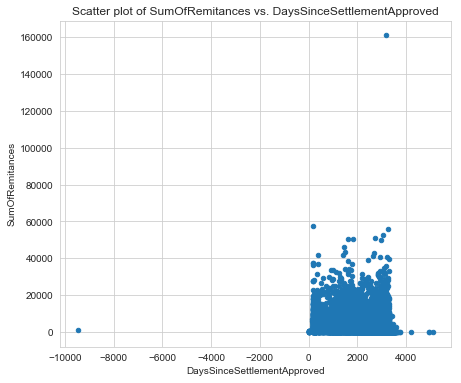

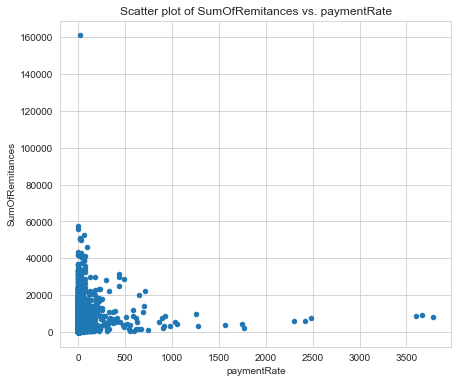

In [24]:
# Two-dimensional plots
def plot_scatter(recoveryDS, cols, col_y = 'SumOfRemitances'):
    for col in cols: 
        fig = plt.figure(figsize=(7,6)) 
        ax = fig.gca()  
        recoveryDS.plot.scatter(x = col, y = col_y, ax = ax)
        ax.set_title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel(col_y)# Set text for y axis
        plt.show()

num_cols = recovery2010.select_dtypes(exclude=[np.object]).columns
plot_scatter(recovery2010, num_cols) 

## Transform variables and feature engineering 

**CollectionClientRequestCode** has one single value [2], intuitively, this feature is important to collection activities. As a result, we do not want to simply remove the column, instead, we should look into data extraction logic.

Simmiliarly, **CollectionInstructionCode** and **CollectionStatusCode** will potentially have significant influence on model prediction power. However, the above plots show the wide range of frequencies for the categorical variables plotted. This will be a problem with modeling, as there are so few members of some categories.

AccountCode - multiple, not unique?? Need to pay close attention to investigate <br>
CollectInvCode- multiple, create new feature NumOfInventoriesPerAccount <br>

In [25]:
print(recovery2010['CollectionClientRequestCode'].unique())

[2]


In [26]:
print(recovery2010['CollectionInstructionCode'].unique())

[ 8 11 10  3  7  1  6  2  5  4 12  9]


In [27]:
print(recovery2010['CollectionStatusCode'].unique())                                

[ 70  36  46  45  37  82  69  68  54   5  53  30   1  71 137 161  23 139
  33   2  18   4  89  12  29  94  84  56  20  99 141  25  31  95  97  38
  61  55  34 102 151  14 105  58  60  21 154 133 111  40  28  35 106 112
  17  83 108  62 148  42]


In [28]:
recovery2010.dtypes

AccountCode                                       int64
CollectInvCode                                    int64
IntRate                                         float64
IntRateOverPrime                                float64
PaymentSchedule                                   int64
TotalBalanceOriginal                            float64
DaysSinceDebtorAccountsLastPaymentDate            int64
DebtorAccountsLastPaymentAmount                 float64
WriteOff                                         object
TotalBalanceCurrent                             float64
DaysSinceDebtorAccountBalanceLastPaymentDate      int64
DebtorAccountBalanceLastPaymentAmount           float64
DaysElapsedBetweenLastPaymentDates                int64
SumOfRemitances                                 float64
CountOfRemitances                                 int64
averageRemitance                                float64
CollectionClientRequestCode                       int64
CollectionInstructionCode                       

In [29]:
# Transform Categorical columns to numeric columsn, for example: transform WriteOff column ['YES', 'NO'] to [0,1]

code_list = [['WriteOff',{'YES' : '1',
                          'NO' : '0'}]]

for col_dic in code_list:
    col = col_dic[0]
    dic = col_dic[1]
    recovery2010[col] = [dic[x] for x in recovery2010[col]]
    
recovery2010['WriteOff']=pd.to_numeric(recovery2010['WriteOff'])

In [30]:
# TO DO: Create dummy variables from categorical features - CollectionInstructionCode, etc.

In [31]:
recovery2010.dtypes

AccountCode                                       int64
CollectInvCode                                    int64
IntRate                                         float64
IntRateOverPrime                                float64
PaymentSchedule                                   int64
TotalBalanceOriginal                            float64
DaysSinceDebtorAccountsLastPaymentDate            int64
DebtorAccountsLastPaymentAmount                 float64
WriteOff                                          int64
TotalBalanceCurrent                             float64
DaysSinceDebtorAccountBalanceLastPaymentDate      int64
DebtorAccountBalanceLastPaymentAmount           float64
DaysElapsedBetweenLastPaymentDates                int64
SumOfRemitances                                 float64
CountOfRemitances                                 int64
averageRemitance                                float64
CollectionClientRequestCode                       int64
CollectionInstructionCode                       

In [32]:
recovery2010.describe()

,AccountCode,CollectInvCode,IntRate,IntRateOverPrime,PaymentSchedule,TotalBalanceOriginal,DaysSinceDebtorAccountsLastPaymentDate,DebtorAccountsLastPaymentAmount,WriteOff,TotalBalanceCurrent,...,CollectionInstructionCode,CollectionStatusCode,collectionInventoryPromiseToPayAmount,daysSinceCollectionInventoryPromiseToPayDate,CommissionIndicator,AgencyId,AgencyManagerId,AgencyCollectorId,DaysSinceSettlementApproved,paymentRate
count,1.544100e+04,1.544100e+04,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,...,15441.000000,15441.000000,1.544100e+04,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15441.000000,15322.000000
mean,1.277092e+06,1.004092e+06,12.517799,0.644415,8.782009,447.149122,1196.513503,97.123842,0.925523,3804.113233,...,7.037498,40.326987,2.383090e+03,12592.394534,0.963150,1533.685254,4182.541804,6286.414481,2471.062690,10.260399
std,1.300381e+05,1.845085e+05,8.992713,1.847671,2.874042,791.584027,4168.504646,388.623814,0.262554,8068.226283,...,2.941675,30.179356,3.867785e+04,18728.024328,0.188399,120.446978,1500.168262,3404.890736,772.553496,77.283273
min,1.099852e+06,0.000000e+00,0.000000,-1.000000,1.000000,0.000000,-9455.000000,0.000000,0.000000,-210.062900,...,1.000000,1.000000,0.000000e+00,-284.000000,0.000000,1326.000000,2276.000000,2277.000000,-9455.000000,0.000000
25%,1.172733e+06,9.121650e+05,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,1.000000,0.311100,...,8.000000,36.000000,0.000000e+00,0.000000,1.000000,1417.000000,4354.000000,4355.000000,1987.000000,0.000000
50%,1.250410e+06,9.914450e+05,19.500000,0.000000,10.000000,142.750000,3204.000000,0.000000,1.000000,480.750000,...,8.000000,37.000000,0.000000e+00,2729.000000,1.000000,1623.000000,4354.000000,4355.000000,2799.000000,1.283009
75%,1.325574e+06,1.068177e+06,19.500000,0.000000,10.000000,582.550000,3357.000000,100.000000,1.000000,3681.408200,...,8.000000,46.000000,1.082600e+02,43506.000000,1.000000,1640.000000,4354.000000,4355.000000,3045.000000,7.419866
max,1.535708e+06,1.276079e+06,24.990000,19.990000,11.000000,15655.680000,11345.000000,15063.000000,1.000000,163978.504200,...,12.000000,161.000000,2.589524e+06,43506.000000,1.000000,1841.000000,13661.000000,14743.000000,5118.000000,3785.971292


In [33]:
# Split the dataset
labels = np.array(recovery2010['paymentRate'])
